#1

In [ ]:
#импорт учебный датасет и необходимые библиотеки.
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris()#записываем датасет в переменную

In [ ]:
print(iris.DESCR)#описание датасета

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
data = pd.DataFrame(iris.data, columns = iris.feature_names)#формируем пандасовский датафрейм
variety = iris.target#переменная содержит колонку с ответами

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


#2

In [ ]:
iris_data = data.iloc[:,[0,1]]#фильт iloc, формируем новый ДФ, который содержит колонки sepal length (cm) и sepal width (cm) согласно задания.

In [ ]:
iris_data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [ ]:
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#3

In [ ]:
from sklearn.model_selection import train_test_split
from scipy.sparse.construct import random

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, variety, random_state=11)#Формируем учебную и тестовую выборку

#4

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis#импортируем класс

In [ ]:
lda = LinearDiscriminantAnalysis()#наша модель называется lda, передаем в нее класс

In [ ]:
lda.fit(X_train,y_train)#обучение модели на тренировочных данных

LinearDiscriminantAnalysis()

In [ ]:
lda.predict(X_test)#делаем прогноз

array([2, 2, 1, 2, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0,
       0, 2, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2])

In [ ]:
from sklearn.metrics import accuracy_score#импорт метод для оценки качества

In [ ]:
accuracy_score(y_test,lda.predict(X_test))#предсказательная сила невысока

0.6842105263157895

In [ ]:
iris_data.corr()#корреляция между х-ми слабая, это хорошо

,sepal length (cm),sepal width (cm)
sepal length (cm),1.00000,-0.11757
sepal width (cm),-0.11757,1.00000


In [ ]:
lda.means_

array([[5.03421053, 3.45789474],
       [5.88205128, 2.71538462],
       [6.57714286, 3.02857143]])

#5

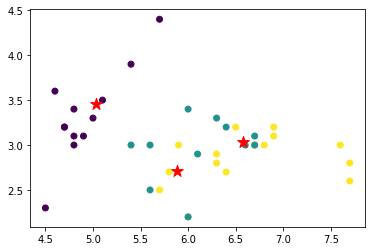

In [ ]:
plt.scatter(x = X_test['sepal length (cm)'], y = X_test['sepal width (cm)'], c = y_test)
plt.scatter(x = lda.means_[:,0], y=lda.means_[:,1], c = 'r', s = 150, marker = '*')
#на графике видим иллюстрацию тезиса, что один класс хорошо отделен от двух других,
#а те между собой не разделены: One class is linearly separable from the other 2; the
#latter are NOT linearly separable from each other

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
iris_data.describe()#в целом значения кажется сопоставимые по масштабу, но в целях тренировки давайте их нормализуем

,sepal length (cm),sepal width (cm)
count,150.000000,150.000000
mean,5.843333,3.057333
std,0.828066,0.435866
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


In [ ]:
scaler = StandardScaler()

In [ ]:
iris_scaled = scaler.fit_transform(iris_data)
iris_scaled

#7

In [ ]:
#пустой список
k_dict = []
#диапазон количества кластеров
k_range = range(1,10)

for k in k_range:
  iris_k = KMeans(n_clusters=k)#к переменной iris_k применяем класс KMeans, параметр которого это количество кластеров(при каждом проходе цикла он соответственно равен к)
  iris_k.fit(iris_scaled)#далее к iris_k применяется метод fit, в качестве параметра передается наш ДФ. В результате при каждой итерации мы получаем то самое среднее расстояние от центра
  k_dict.append(iris_k.inertia_)

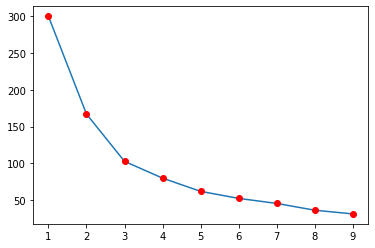

In [ ]:
plt.plot(k_range, k_dict)
plt.plot(k_range, k_dict,'ro')